In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [162]:
!wget https://github.com/kaopanboonyuen/Python-Data-Science/raw/master/Dataset/hed2020_dataset.csv hed_dataset.csv

--2023-02-09 16:47:11--  https://github.com/kaopanboonyuen/Python-Data-Science/raw/master/Dataset/hed2020_dataset.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kaopanboonyuen/Python-Data-Science/master/Dataset/hed2020_dataset.csv [following]
--2023-02-09 16:47:11--  https://raw.githubusercontent.com/kaopanboonyuen/Python-Data-Science/master/Dataset/hed2020_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 352588 (344K) [text/plain]
Saving to: ‘hed2020_dataset.csv.5’

hed2020_dataset.csv 100%[===================>] 344.32K  --.-KB/s    in 0.03s   

2023-02-09 16:47:11 (10.0 MB/s) -

In [163]:
df = pd.read_csv('hed2020_dataset.csv')

In [164]:
print ('Shape of hed2020_dataset', df.shape)

Shape of hed2020_dataset (5824, 24)


In [165]:
df.head(5)

,id,label,cap-shape,cap-surface,bruises,odor,gill-attachment,gill-spacing,gill-size,stalk-shape,...,ring-number,ring-type,spore-print-color,population,habitat,cap-color-rate,gill-color-rate,veil-color-rate,stalk-color-above-ring-rate,stalk-color-below-ring-rate
0,1,p,x,s,t,p,f,c,n,e,...,o,p,k,s,u,1.0,3.0,1.0,1.0,1.0
1,2,e,x,s,t,a,f,c,b,e,...,o,p,n,n,g,2.0,3.0,1.0,1.0,1.0
2,3,e,b,s,t,l,f,c,b,e,...,o,p,n,n,m,3.0,1.0,1.0,1.0,1.0
3,4,p,x,y,t,p,f,c,n,e,...,o,p,k,s,u,3.0,1.0,1.0,1.0,1.0
4,5,e,x,s,f,n,f,w,b,t,...,o,e,n,a,g,4.0,3.0,1.0,1.0,1.0


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           5824 non-null   int64  
 1   label                        5764 non-null   object 
 2   cap-shape                    5824 non-null   object 
 3   cap-surface                  5797 non-null   object 
 4   bruises                      5725 non-null   object 
 5   odor                         5725 non-null   object 
 6   gill-attachment              5725 non-null   object 
 7   gill-spacing                 5694 non-null   object 
 8   gill-size                    5703 non-null   object 
 9   stalk-shape                  5703 non-null   object 
 10  stalk-root                   5793 non-null   object 
 11  stalk-surface-above-ring     5793 non-null   object 
 12  stalk-surface-below-ring     5793 non-null   object 
 13  veil-type         

In [167]:
df.describe(include = 'all')

,id,label,cap-shape,cap-surface,bruises,odor,gill-attachment,gill-spacing,gill-size,stalk-shape,...,ring-number,ring-type,spore-print-color,population,habitat,cap-color-rate,gill-color-rate,veil-color-rate,stalk-color-above-ring-rate,stalk-color-below-ring-rate
count,5824.000000,5764,5824,5797,5725,5725,5725,5694,5703,5703,...,5762,5762,5768,5768,5793,5797.000000,5703.000000,5762.000000,5793.000000,5762.000000
unique,NaN,2,5,4,2,9,2,2,2,2,...,3,5,8,6,7,NaN,NaN,NaN,NaN,NaN
top,NaN,p,f,y,f,n,f,c,b,t,...,o,p,w,v,d,NaN,NaN,NaN,NaN,NaN
freq,NaN,3660,2397,2517,3849,2235,5518,5234,3663,3282,...,5132,2379,2380,3521,2608,NaN,NaN,NaN,NaN,NaN
mean,2912.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.327411,5.888480,1.019264,2.310375,3.632419
std,1681.388315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.856785,2.812418,0.147220,1.664648,2.370531
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1456.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,4.000000,1.000000,1.000000,1.000000
50%,2912.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.000000,6.000000,1.000000,2.000000,5.000000
75%,4368.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.000000,9.000000,1.000000,3.000000,5.000000


In [168]:
df['label'].value_counts()

p    3660
e    2104
Name: label, dtype: int64

2. Choose edible mushrooms only.

In [169]:
df = df[df['label']=='e']
df.shape

(2104, 24)

3.  Only the variables below have been selected to describe the distinctive characteristics of edible mushrooms

'cap-color-rate','stalk-color-above-ring-rate'

In [170]:
df = df[['cap-color-rate', 'stalk-color-above-ring-rate']]
df.head(10)

,cap-color-rate,stalk-color-above-ring-rate
1,2.0,1.0
2,3.0,1.0
4,4.0,1.0
5,2.0,1.0
6,3.0,1.0
7,3.0,1.0
9,2.0,1.0
10,2.0,1.0
11,2.0,1.0
12,2.0,1.0


4. Provide a proper data preprocessing as follows:

- Fill missing with mean 

- Standardize variables with Standard Scaler

5. K-means clustering with 5 clusters and seed = 2020.

6. Show the centroid of each cluster.



In [171]:
df['cap-color-rate'] = df['cap-color-rate'].fillna(df['cap-color-rate'].mean())
df['stalk-color-above-ring-rate'] = df['stalk-color-above-ring-rate'].fillna(df['stalk-color-above-ring-rate'].mean())

In [172]:
for var in df.columns.tolist():
    missing_values = df[var].isna().sum()
    print(var, missing_values)

cap-color-rate 0
stalk-color-above-ring-rate 0


In [173]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [174]:
print(scaler.mean_)

[3.46758818 2.41040462]


In [175]:
X = scaler.transform(df)

In [176]:
kmeans = KMeans(n_clusters=5, random_state=2020).fit(X)

In [177]:
centroid = kmeans.cluster_centers_

In [178]:
centroid_original = scaler.inverse_transform(centroid, copy=None)
centroid_original

array([[4.2934616 , 1.70225065],
       [1.        , 6.76190476],
       [1.01351351, 1.85661095],
       [8.47126437, 1.        ],
       [5.88222965, 6.        ]])

In [179]:
clusters = kmeans.labels_
clusters

array([2, 0, 0, ..., 1, 1, 1], dtype=int32)

In [180]:
res_df = df.copy()
res_df['cluster'] = clusters
res_df

,cap-color-rate,stalk-color-above-ring-rate,cluster
1,2.0,1.0,2
2,3.0,1.0,0
4,4.0,1.0,0
5,2.0,1.0,2
6,3.0,1.0,0
...,...,...,...
5815,1.0,7.0,1
5819,1.0,7.0,1
5820,1.0,7.0,1
5821,1.0,7.0,1


In [181]:
count = res_df['cluster'].value_counts()
count.sort_index()

0    1269
1     231
2     444
3      87
4      73
Name: cluster, dtype: int64

In [182]:
cluster_groups = res_df.groupby('cluster')

In [183]:
for name, group in cluster_groups:
    print("Cluster {} (size = {})".format(name, count[name]))
    print("Mean of cap-color-rate:", group['cap-color-rate'].mean())
    print("Mean of stalk-color-above-ring-rate:", group['stalk-color-above-ring-rate'].mean())
    print("Centroid: ", centroid_original[name])
    print()

Cluster 0 (size = 1269)
Mean of cap-color-rate: 4.293461595380343
Mean of stalk-color-above-ring-rate: 1.7022506456770385
Centroid:  [4.2934616  1.70225065]

Cluster 1 (size = 231)
Mean of cap-color-rate: 1.0
Mean of stalk-color-above-ring-rate: 6.761904761904762
Centroid:  [1.         6.76190476]

Cluster 2 (size = 444)
Mean of cap-color-rate: 1.0135135135135136
Mean of stalk-color-above-ring-rate: 1.856610946206322
Centroid:  [1.01351351 1.85661095]

Cluster 3 (size = 87)
Mean of cap-color-rate: 8.471264367816092
Mean of stalk-color-above-ring-rate: 1.0
Centroid:  [8.47126437 1.        ]

Cluster 4 (size = 73)
Mean of cap-color-rate: 5.882229651200752
Mean of stalk-color-above-ring-rate: 6.0
Centroid:  [5.88222965 6.        ]



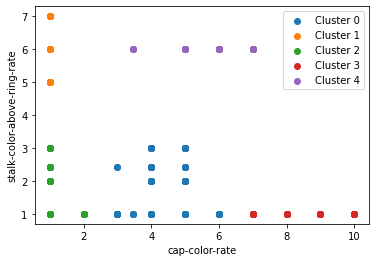

In [184]:
for cluster in np.unique(clusters):
    data = res_df[res_df['cluster'] == cluster]
    plt.scatter(data['cap-color-rate'], data['stalk-color-above-ring-rate'], label=f'Cluster {cluster}')

plt.xlabel("cap-color-rate")
plt.ylabel("stalk-color-above-ring-rate")
plt.legend()
plt.show()